In [ ]:
############### I have done this project in google colab ###############

In [ ]:
# mounting google drive 
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
# I have created a folder namely WSI and added 5 whole slide images to the folder and uploaded it in drive
# I am unzipping it in colab notebook
!unzip "/content/drive/MyDrive/WSI.zip"

Archive:  /content/drive/MyDrive/WSI.zip
   creating: WSI/
  inflating: WSI/wsi_3.svs           
  inflating: WSI/wsi_4.svs           
  inflating: WSI/wsi_5.svs           
  inflating: WSI/wsi_2.svs           
  inflating: WSI/wsi_1.svs           


In [ ]:
# I am using libvips, a fast image processing library for whole slide images
# I have downloaded the tar file from libvips project website https://github.com/libvips/libvips/releases and uploaded it in drive
# I am unzipping it in colab notebook
!unzip "/content/drive/MyDrive/vips-8.10.5.zip"

Archive:  /content/drive/MyDrive/vips-8.10.5.zip
   creating: vips-8.10.5/
  inflating: vips-8.10.5/ChangeLog   
  inflating: vips-8.10.5/THANKS      
  inflating: vips-8.10.5/test-driver  
  inflating: vips-8.10.5/config.guess  
  inflating: vips-8.10.5/configure.ac  
   creating: vips-8.10.5/libvips/
   creating: vips-8.10.5/libvips/draw/
  inflating: vips-8.10.5/libvips/draw/drawink.c  
  inflating: vips-8.10.5/libvips/draw/draw_line.c  
  inflating: vips-8.10.5/libvips/draw/draw_circle.c  
  inflating: vips-8.10.5/libvips/draw/draw_flood.c  
  inflating: vips-8.10.5/libvips/draw/draw_rect.c  
  inflating: vips-8.10.5/libvips/draw/pdraw.h  
  inflating: vips-8.10.5/libvips/draw/Makefile.in  
  inflating: vips-8.10.5/libvips/draw/draw_smudge.c  
  inflating: vips-8.10.5/libvips/draw/draw_image.c  
  inflating: vips-8.10.5/libvips/draw/drawink.h  
  inflating: vips-8.10.5/libvips/draw/draw_mask.c  
  inflating: vips-8.10.5/libvips/draw/draw.c  
  inflating: vips-8.10.5/libvips/draw/Ma

In [ ]:
# building libvips from source tarball
!/content/vips-8.10.5/configure

checking for a BSD-compatible install... /usr/bin/install -c
checking whether build environment is sane... yes
checking for a thread-safe mkdir -p... /bin/mkdir -p
checking for gawk... no
checking for mawk... mawk
checking whether make sets $(MAKE)... yes
checking whether make supports nested variables... yes
checking for pkg-config... /usr/bin/pkg-config
checking pkg-config is at least version 0.9.0... yes
checking for gobject-introspection... no
checking build system type... x86_64-pc-linux-gnu
checking host system type... x86_64-pc-linux-gnu
checking for needs -lstdc++... yes
checking for native Win32... no
checking for binary open needed... no
checking for Mac OS X... no
checking whether make supports the include directive... yes (GNU style)
checking for gcc... gcc
checking whether the C compiler works... yes
checking for C compiler default output file name... a.out
checking for suffix of executables... 
checking whether we are cross compiling... no
checking for suffix of object fi

In [ ]:
# building libvips from source tarball
!chmod +x /content/vips-8.10.5/Makefile.in

In [ ]:
# building libvips from source tarball
!make install

Making install in libvips
make[1]: Entering directory '/content/libvips'
Making install in include
make[2]: Entering directory '/content/libvips/include'
Making install in vips
make[3]: Entering directory '/content/libvips/include/vips'
make[4]: Entering directory '/content/libvips/include/vips'
make[4]: Nothing to be done for 'install-exec-am'.
 /bin/mkdir -p '/usr/local/include/vips'
 /usr/bin/install -c -m 644 /content/vips-8.10.5/libvips/include/vips/version.h '/usr/local/include/vips'
 /bin/mkdir -p '/usr/local/include/vips'
 /usr/bin/install -c -m 644 /content/vips-8.10.5/libvips/include/vips/connection.h /content/vips-8.10.5/libvips/include/vips/sbuf.h /content/vips-8.10.5/libvips/include/vips/basic.h /content/vips-8.10.5/libvips/include/vips/type.h /content/vips-8.10.5/libvips/include/vips/gate.h /content/vips-8.10.5/libvips/include/vips/almostdeprecated.h /content/vips-8.10.5/libvips/include/vips/deprecated.h /content/vips-8.10.5/libvips/include/vips/arithmetic.h /content/vips

In [ ]:
# building libvips from source tarball
!ldconfig

/sbin/ldconfig.real: /usr/local/lib/python3.7/dist-packages/ideep4py/lib/libmkldnn.so.0 is not a symbolic link



In [ ]:
import os

In [ ]:
# creating a directory to store the tiles
if not os.path.isdir("/content/tiles"):
  os.mkdir("/content/tiles")

In [ ]:
%%writefile wsi_to_tile.c
#include<stdio.h>
#include<vips/vips.h>
int main (int argc, char **argv)
{ 
  /* C code for reading whole slide images and converting into tiles */
  if (VIPS_INIT (argv[0]))/*initializing VIPS*/
    vips_error_exit ("unable to start VIPS");
  int i;
  for(i=1;i<=5;++i){/*since there are 5 wsi images in my WSI folder, loop is run 5 times*/
      VipsImage *in;
      char img_path[50];
      sprintf(img_path,"/content/WSI/wsi_%d.svs",i);/*input image path*/
      if( !(in = vips_image_new_from_file(img_path, NULL )) )/*reading image*/
        vips_error_exit( NULL );
      printf("image width of %d slide = %d\n", i,vips_image_get_width( in ));
      printf("image height of %d slide = %d\n",i,vips_image_get_height(in));
      int patch_size=512,width=vips_image_get_width(in),height=vips_image_get_height(in),n_patches=0;
      int n_across=width/patch_size,n_down=height/patch_size;
      int x,y,count=1,flag=0;
      /*extracting tiles*/
      for(y=0;y<n_down;++y){
          for(x=0;x<n_across;++x){
              if(n_patches%1000==0){/* Since number of tiles generated would be large, so I have taken 10 tiles per each WSI image*/
                  VipsImage *out;
                  if(vips_extract_area(in,&out,x*patch_size,y*patch_size,patch_size,patch_size,NULL))/*extracting tile*/
                    printf("%s","error");
                  char output_path[50];
                  sprintf(output_path,"/content/tiles/wsi_%d_tile_%d.png",i,count++);
                  if( vips_image_write_to_file(out ,output_path, NULL ) )/*writing tile to output directory*/
                    vips_error_exit( NULL );
                  if(count==11){/*Taking only 10 tiles for each WSI*/
                      flag=1;
                      break;
                  }
              }
              n_patches++;
            }
            if(flag==1) break;
      }
  }
  vips_shutdown ();
  return 0;
}

Overwriting wsi_to_tile.c


In [ ]:
# compiling c code which is written to wsi_to_tile.c
!gcc -g  wsi_to_tile.c `pkg-config vips --cflags --libs` -o output

In [ ]:
# running the code
!./output

image width of 1 slide = 111080
image height of 1 slide = 30361
image width of 2 slide = 113294
image height of 2 slide = 39814
image width of 3 slide = 97673
image height of 3 slide = 27379
image width of 4 slide = 108528
image height of 4 slide = 24178
image width of 5 slide = 93296
image height of 5 slide = 28206


In [ ]:
import tensorflow as tf

In [ ]:
# getting image paths
import glob
data_dir = '/content/tiles/'
image_paths = glob.glob(data_dir + '*.png')

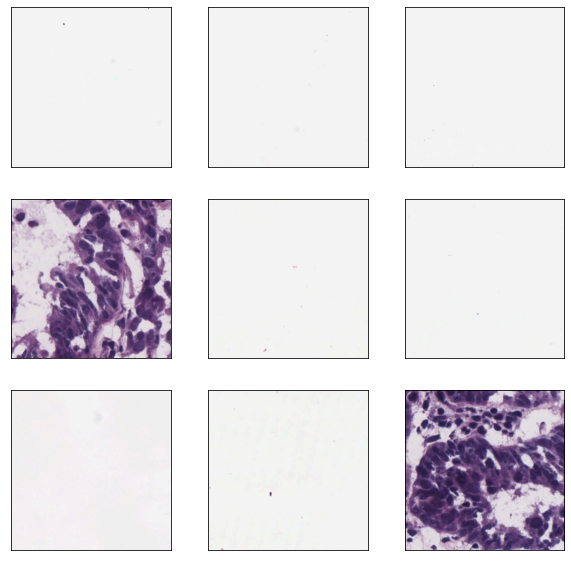

In [ ]:
# displaying first 9 tiles
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i, path in enumerate(image_paths[:9]):
    img = tf.keras.preprocessing.image.load_img(path)
    plt.subplot(3,3,i+1)
    plt.xticks([]),plt.yticks([])
    plt.imshow(img)
plt.show()

In [ ]:
# creating tf.train.Feature for byte,float and int
def _bytes_feature(value):
    if isinstance(value, type(tf.constant(0))):
        value = value.numpy() 
    return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

def _float_feature(value):
    return tf.train.Feature(float_list=tf.train.FloatList(value=[value]))

def _int64_feature(value):
    return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))

In [ ]:
# serialization
def serialize_example(image,image_shape):
    feature = {
        'image': _bytes_feature(image),
        'height': _int64_feature(image_shape[0]),
        'width': _int64_feature(image_shape[1]),
        'depth': _int64_feature(image_shape[2]),
    }
    example_proto = tf.train.Example(features=tf.train.Features(feature=feature))
    return example_proto.SerializeToString()

In [ ]:
# writing to tfrecord
tfrecord_dir = '/content/data.tfrecord'# output directory path for tfrecord
with tf.io.TFRecordWriter(tfrecord_dir) as writer:
    for image_path in image_paths:
        img = tf.keras.preprocessing.image.load_img(image_path)#loading image
        img_array = tf.keras.preprocessing.image.img_to_array(img)#converting image to array
        img_bytes = tf.io.serialize_tensor(img_array)
        image_shape = img_array.shape
        example = serialize_example(img_bytes,image_shape)#serialize
        writer.write(example)#write

In [ ]:
# function to read tfrecord
def read_tfrecord(serialized_example):
    feature_description = {
        'image': tf.io.FixedLenFeature((), tf.string),
        'height': tf.io.FixedLenFeature((), tf.int64),
        'width': tf.io.FixedLenFeature((), tf.int64),
        'depth': tf.io.FixedLenFeature((), tf.int64)
    }
    example = tf.io.parse_single_example(serialized_example, feature_description)
    
    image = tf.io.parse_tensor(example['image'],out_type=float)
    image_shape = [example['height'], example['width'], example['depth']]
    return image

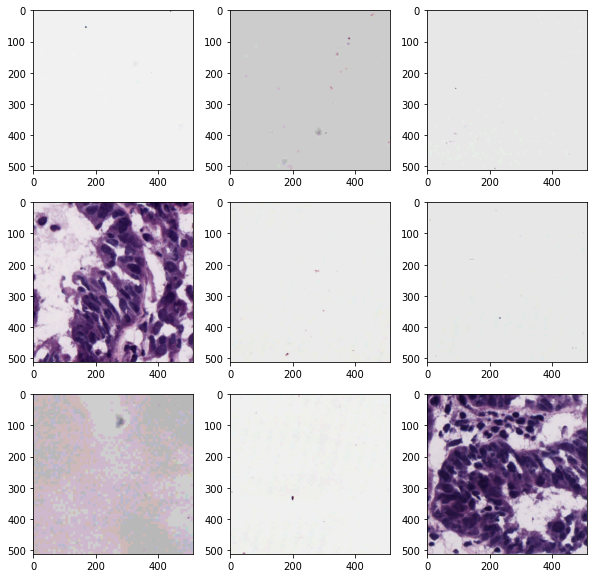

In [ ]:
# tfrecord reading
tfrecord_dataset = tf.data.TFRecordDataset(tfrecord_dir)
parsed_dataset = tfrecord_dataset.map(read_tfrecord)
plt.figure(figsize=(10,10))
for i, data in enumerate(parsed_dataset.take(9)):
    img = tf.keras.preprocessing.image.array_to_img(data)
    plt.subplot(3,3,i+1)
    plt.imshow(img)
plt.show()